In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
# data collection and processing

#1. Loading the csv data into a Panda DataFrame

gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print the last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
# getting basic info about the data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking the number of missing values

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
# find correlation between dataset:
#1. Positive correlation
#2. Negative correlation

correlation = gold_data.corr()

C:\Users\flymo\AppData\Local\Temp\ipykernel_17184\3571298988.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

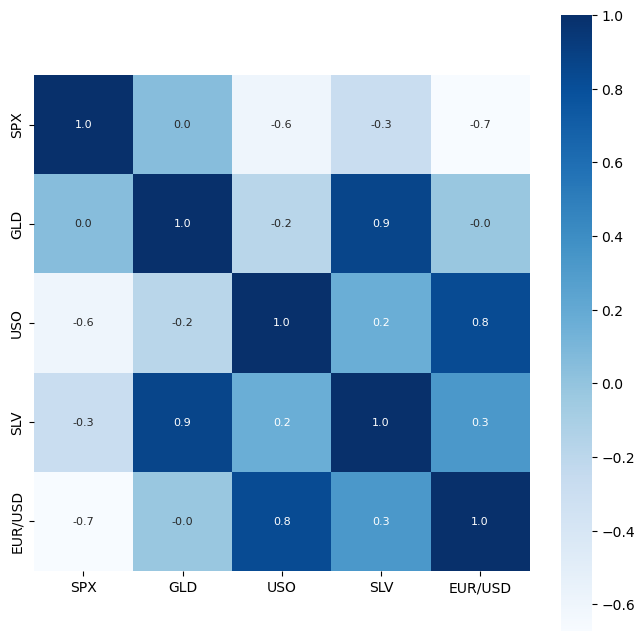

In [12]:
# constructing the heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

In [13]:
# correlation values of the GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


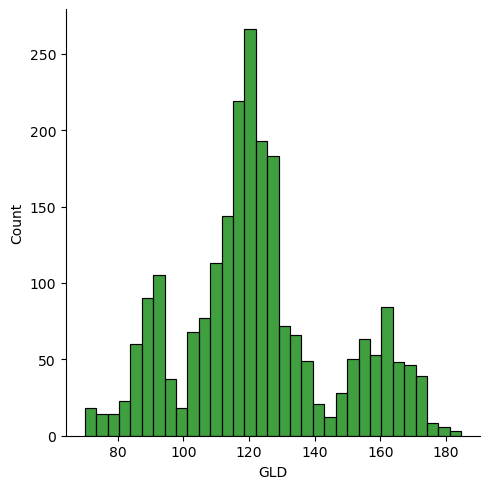

In [16]:
# check the distribution of the GLD price
sns.displot(gold_data['GLD'], color='green')

In [17]:
# Split the features and target
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
# Split into training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [21]:
# Model training: Random Forest Regressor

regressor = RandomForestRegressor(n_estimators=100)

In [22]:
# train the model

regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [23]:
# Model evaluation

# prediction on Test Data

test_data_prediction = regressor.predict(X_test)

In [24]:
print(test_data_prediction)

[168.53249956  82.01149991 115.72109983 127.64230061 120.7701012
 154.76779753 150.30189814 126.00130077 117.47549862 125.83720149
 116.44640087 172.51350127 141.56399829 167.93969875 115.07370013
 117.95240081 139.14260285 170.19170126 159.80640339 157.24059969
 155.16190012 125.31540024 176.18309947 156.63110338 125.19460037
  93.81509955  77.16350018 120.41149979 119.01249882 167.35980022
  87.94890008 124.96039995  91.04830107 117.40660037 121.08799912
 136.82000053 115.60780085 114.6625005  146.47019876 107.34750109
 104.24040248  87.37699818 126.36490078 117.95339982 153.7511992
 119.72019981 108.35160036 108.36399837  93.28320068 127.13839754
  74.94030033 113.71259946 121.03970026 111.08499931 118.8425989
 121.06079935 159.04889962 167.87460144 146.93029646  85.96839869
  94.33220038  86.79449882  90.63850018 119.03750068 126.42700043
 127.6649001  168.93219969 122.21729943 117.5721989   98.55540024
 167.86500094 143.06079915 132.0320028  121.15060225 121.9074994
 119.66420047 

In [25]:
# use R squared error to compare the predicted values with the actual values

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9891009613248389


In [26]:
# Compare the actual values and predicted values in a plot

# convert Y test value to a list

Y_test = list(Y_test)

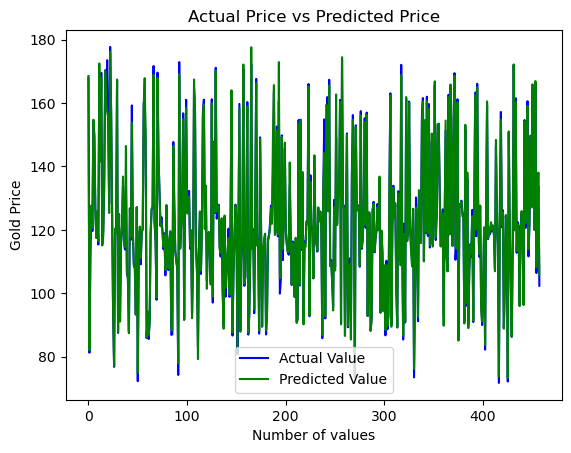

In [27]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()